In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hfgtools import *

In [5]:
aqh = pd.read_csv(path + '\\output\\question_history.csv')

In [12]:
#oa = pd.read_csv(path + '\\output\\online_application.csv')
am = pd.read_csv(path + '\\output\\application_members.csv')

In [8]:
aqh.shape

(102872, 15)

In [13]:
am.rename(columns={'ID':'AMID'}, inplace=True)

In [14]:
#df = aqh.merge(oa[['KeyApplication', 'ID']], on = 'KeyApplication', how='left')
df2 = df.merge(am[['KeyApplication', 'AMID']], on = 'KeyApplication', how='right')

In [15]:
df2.shape

(197508, 17)

In [16]:
df2.to_csv(path + '\\output\\question_history.csv', index=False)

In [118]:
aqh.Question.unique()

array(['Do you require a wheelchair accessible unit? This question is for data purposes only.',
       'Are you or anyone in your household currently homeless?  This includes currently living in a car, on the street, in an emergency shelter, transitional housing, or currently living in a friend or family members home, or couch surfing? If yes, where are you currently living?',
       'Did someone help you complete this application? If yes, then who?',
       'How did you hear about our wait list opening?  Please fill in the following box with an answer (Ex. Text message, email, Facebook, RegisterGuard, family/friend, etc.)'],
      dtype=object)

In [94]:
aqh.Preference.unique()

array(['P5', 'P7', 'P8', 'P9'], dtype=object)

In [97]:
aqh[aqh.Preference=='P5'].Answer.unique()

array(['No', 'Yes'], dtype=object)

In [98]:
aqh[aqh.Preference=='P5']['Answer'].value_counts().rename_axis('wheelchair?').reset_index(name='counts')

,wheelchair?,counts
0,No,24322
1,Yes,1396


In [3]:
aqh = reorganize_aqh()

Elapsed time for reorganizing question history: 1.44minutes


In [4]:
aqh.to_csv(path + '\\output\\question_history.csv', index=False)

In [132]:
aqh.head()

,QuestionID,KeyApplication,Question,Preference,Answer,Response,TSModified,TSCreated,P7SCat,P7BCat,P8SCat,P8BCat,P9SCat,P9BCat,P9Cat
0,1518,5419013,Do you require a wheelchair accessible unit? T...,P5,No,NaN,2022-07-26 12:06:25,2022-07-26 12:06:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2072,5419013,Are you or anyone in your household currently ...,P7,No,NaN,2022-07-26 12:06:25,2022-07-26 12:06:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2083,5419013,Did someone help you complete this application...,P8,No,NaN,2022-07-26 12:06:25,2022-07-26 12:06:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2084,5419013,How did you hear about our wait list opening? ...,P9,Yes,Homes for Good email,2022-07-26 12:06:25,2022-07-26 12:06:25,NaN,NaN,NaN,NaN,Homes For Good,Homes For Good,Email
4,1518,5419021,Do you require a wheelchair accessible unit? T...,P5,No,NaN,2022-07-26 12:07:49,2022-07-26 12:07:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
aqh[aqh.Preference=='P7']['Answer'].value_counts().rename_axis('homeless?').reset_index(name='counts')

,homeless?,counts
0,Yes,13727
1,No,11991


In [109]:
13727/(13727+11991)

0.5337506804572673

In [70]:
list(aqh.loc[(aqh.Preference=='P7') & (aqh.Answer=='Yes'), 'Response'].unique())

['Svdp shelter',
 "I'm living with my ex. I will be on the street at the end of this upcoming January.",
 'Friends house',
 'Eugene, OR',
 '1022 w 4th Ave \nEugene, OR 97402',
 'I am living with my ex. Whether I have a place to go or not, I am required to leave at the end of the upcoming January.',
 'Svdp night shelter',
 'Couch surfing',
 'Staying with adult children and friends on couch.',
 'Residential Treatment at Willamette Family Cheshire',
 'Sherman housing authority',
 'friends',
 'I have a tent up in the Whiteaker community, on the grounds of Alluvium (non-profit charity and church).',
 'Yes, Am in SSDI process, and living with family member as Disabled.',
 'Svdp might shelter',
 'Varies places around Eugene Oregon where I can pitch my tent',
 'Franklin and hilyard ave',
 'Willammette Family',
 'Wherever we can for now',
 'Living with family member',
 'Living with family',
 "I am currently staying on my cousin's couch in Salem but the housing is not permanent",
 'I sleep in my

In [114]:
p7 = reorganizeP7()

In [104]:
p7.loc[p7.P7SCat == "unspecified location", "Response"].unique()

array(['I am.', 'Teen challenge', 'Homeless', 'Shelly hatfield',
       'Kevyn Smith', "A woman's house in a bedroom but wants us gone.",
       'no', "Both living in a woman's house and wants us gone", 'yes',
       "Both living in a bedroom in a woman's house", 'I am unhoused.',
       "Both of us are living in a small bedroom in a woman's house and wants us gone",
       "Both living in a bedroom in a woman's house.",
       'Leaving washington didnt plan very well. i ported my voucher now i am homeless as of 8/29/22',
       'Unhoused on 8/20/2022',
       'got a termination notice for the end of this week.', 'Myself',
       'Conestoga', 'yes the whole household', 'Skylar Bursell',
       'Mario land', 'Homeless for over a year',
       'Homeless living near mario land',
       'We are homeless as of July 25th', 'Yes homeless as of July 25th',
       "I don't live anywhere", 'For over a year both of us', 'EM',
       'self', 'Self', 'my ar', 'SELF', 'HOmeless',
       'Self and pr

In [115]:
hlcnt = p7['P7BCat'].value_counts().rename_axis('homeless_living').reset_index(name='counts')

In [116]:
hlcnt.to_csv(path+'\\output\\homeless_living_count.csv', index=False)

In [99]:
p7.loc[p7.P7BCat == "Shelter", "P7SCat"].unique()

array(['SVDP Shelter', 'Emergency shelter', 'Eugene Mission', 'shelter',
       'Community Supported Shelters', 'Project Roomkey',
       'Everyone Village', 'FEMA housing'], dtype=object)

In [100]:
p7[p7.P7BCat == "Shelter"]["P7SCat"].value_counts().rename_axis('shelter').reset_index(name='counts')

,shelter,counts
0,SVDP Shelter,1457
1,shelter,487
2,Eugene Mission,264
3,Community Supported Shelters,252
4,Emergency shelter,207
5,Project Roomkey,107
6,Everyone Village,75
7,FEMA housing,31


In [106]:
p7[p7.P7BCat == "Community Members'"]["P7SCat"].value_counts().rename_axis('community_member').reset_index(name='counts')

,community_member,counts
0,family/friends',3832
1,couch surfing,915


In [117]:
p8 = reorganizeP8()

In [6]:
p8.loc[p8.P8SCat == "unknown", "Response"].unique()

array(['Chris', '07/26/2022', 'No', 'Diedra', 'Viola', 'diedra',
       'Shirley', 'linz', 'anc', 'Dpn', 'Maclain', 'Tasherra', 'Choice',
       'Nicole0110', 'din', 'Sleeping in my truckerpinan',
       'Section 8 HCV 2022 Waitlist', 'PH 1 bdrm Riverview', 'carol',
       'Living in my mini van', 'dpm'], dtype=object)

In [118]:
wh_cnt = p8['P8BCat'].value_counts().rename_axis('who_helped').reset_index(name='counts')

In [119]:
wh_cnt.to_csv(path+'\\output\\who_helped.csv', index=False)

In [8]:
p8.loc[p8.P8BCat == "Community Organization", "P8SCat"].unique()

array(['Catholic Community Services', 'ShelterCare',
       'Catholic Charities of Oregon', 'St. Vincent de Paul',
       'Eugene Public Library', 'Lane Community College'], dtype=object)

In [120]:
p9 = reorganizeP9()

In [63]:
p9.loc[p9.P9SCat == "unknown", "Response"].unique()

array(['No', 'na', 'lane', 'no', 'My group home', 'none', 'ACH', 'RSC',
       'Na', 'N/a', 'Wayne Martin', 'Not sure', 'Shirley', 'Etc', 'Leann',
       'Jennings', 'Hannah spomer',
       'Staff assisting to find housing told me about it.', 'RAC', 'dis',
       'David', 'YH Staff', 'Yes', 'downtown', 'Kim singler', 'DevNW',
       'david', 'eldery man', 'Not applicable', 'From the form.', 'no.',
       'people', '*', 'EDD', 'gaia', '>', '.', 'E', 'Luci',
       'westown on 8th mgr', '/', 'Healthy families lady named Hayley',
       'Scot', 'Enfermera', 'john stewrd', 'barn', 'TREESACAUDELL',
       'None', 'Customer', 'OREM', 'Housing', 'Just by chance', 'Ema',
       'Davina Prakash', 'Samuel Baratta', 'Mary Wagner', 'SHA',
       'India Stanley', 'w',
       'Lady told me when she heard how desperate I am to get closer.',
       'Opening announcement Notification', 'HA', 'Heather Rogers', 'Mim',
       'Famt', 'Sissi Decroos', 'Gloria', ',', 'Full Access',
       'Service station',

In [55]:
p9['P9SCat'].value_counts().rename_axis('how_heard').reset_index(name='counts').head(10)

,how_heard,counts
0,family and friends,5061
1,human services,3436
2,Email,3297
3,Homes For Good,1923
4,Facebook,1558
5,website,1186
6,St. Vincent de Paul,1110
7,text message,612
8,Laurel Hill Center,597
9,Willamette Family,561


In [121]:
hh_cnt = p9['P9BCat'].value_counts().rename_axis('how_heard').reset_index(name='counts')

In [122]:
hh_cnt.to_csv(path+'\\output\\how_heard.csv', index=False)

In [57]:
p9.loc[p9.P9SCat == "family and friends", "Response"].unique()

array(['Family / Friend', 'Friend', 'Sister', 'Family', 'mom', 'friends',
       'family', 'Friends', 'Mom', 'friend', 'Through my daughter',
       'Family / Friends', 'my mom', 'Mother', 'family friend',
       'Family/friend', 'family/friends', 'My daughter', 'Family member',
       'father', 'My roommate told me about it', 'My kids',
       'Church friend', 'from friends', 'brother', 'family and friend',
       'Family friend', 'family/Friend', 'Heard from friend.',
       'Family and Friends', 'Friends/Famiily', 'Familial',
       'Church friends', 'From a friend', "From Athena's daughter, Erin.",
       'A friend told me about it', 'Causin', 'Friend from church',
       'Freind', 'daughter', 'from a friend', 'Friend, Carla Barnes',
       'Family and friends', 'My ex-wife', 'Neighbor', 'Ex-wife',
       "Athena's daughter Ariel", 'Family/Friend', 'My Daughter',
       "Athena's daughter, Ariel.", 'A Friend', 'Childs Mother',
       'A friend', 'FAMILY', 'a friend in recovery.', '

In [49]:
p9[p9.Response == "First place family center"]

,QuestionID,KeyApplication,Question,Preference,Answer,Response,TSModified,TSCreated,P9SCat,P9BCat,P9Cat
1775,2084,5419943,How did you hear about our wait list opening? ...,P9,Yes,First place family center,2022-07-26 12:30:27,2022-07-26 12:30:27,family and friends,Community Member,Multiple Channels


In [64]:
p9.loc[p9.P9BCat == "Community Organization", "Response"].unique()

array(['St. Vincent de Paul', 'Shelter an counsoler',
       'i always check the lists im in need of a home', 'SVDP',
       'Catholic Community Services, during an intake apt',
       'I always check the lists been trying to get in',
       'First place family center', 'catholic community office',
       'I always check the lists i need a home', 'St, Vincent de Paul',
       'Case Manager at St. Vincent de Paul - Alicia Clarkson',
       'Catholic community services', 'ShelterCare, St. Vincent de Paul',
       'work, catholic community services', 'ShelterCare', 'Head Start',
       'CCS', 'The Guest House', 'Public library.',
       'Center for Family development, friend, St Vincent de Paul',
       'St Vincent Depaul', 'Non-profit agency', 'Amber',
       'SVdP of Lane County case managers', 'SVDP Housing Case Manager',
       'St. Vincent De Paul', 'Springfield Eugene Tenant Association',
       'SVDP Case Manager', 'Shelter care skills assistant Micheal',
       'svdp Case Manager'

In [123]:
hhc_cnt = p9['P9Cat'].value_counts().rename_axis('how_heard').reset_index(name='counts')

In [124]:
hhc_cnt.to_csv(path+'\\output\\how_heard_count.csv', index=False)

In [65]:
p9.loc[p9.P9Cat == "Word of Mouth", "Response"].unique()

array(['My current roommate told me about it',
       'My current roommate told me', 'My roommate told me about it',
       'My family coach told me about it and I need it so bad with all the kids I have',
       'Heard from friend.',
       'One of my case managers told me about the waiting list opening today. Kim was here at DHS to help fill out this paperwork so i might be able to get into my own place. I still have infection in my body and may have to have more of my foot amputated and need my own place to rest and heal.',
       'Word of mouth', 'My mental Health councilor and sister told me.',
       'word of mouth', 'A friend told me about it',
       'One of my case workers at Senior & Disability Services told me to apply.',
       'Our landlord told us about it',
       'I heard from you through my therapy with José Mora Santana',
       'WE heard about the program through a work source housing specialist Gretchen Stupke',
       'My daughter told me',
       'Family member wh

In [67]:
aqh[(aqh.KeyApplication.isin(aqh[aqh.Response == 'no'].KeyApplication.unique())) & (aqh.Preference=='P8')]

,QuestionID,KeyApplication,Question,Preference,Answer,Response,TSModified,TSCreated
6238,2083,5421657,Did someone help you complete this application...,P8,No,no,2022-07-26 13:07:16,2022-07-26 13:07:16
6422,2083,5421720,Did someone help you complete this application...,P8,No,no,2022-07-26 13:08:45,2022-07-26 13:08:45
7194,2083,5422008,Did someone help you complete this application...,P8,No,NaN,2022-07-26 13:15:50,2022-07-26 13:15:50
10402,2083,5423297,Did someone help you complete this application...,P8,No,no,2022-07-26 13:57:49,2022-07-26 13:57:49
10590,2083,5423367,Did someone help you complete this application...,P8,No,no,2022-07-26 13:59:57,2022-07-26 13:59:57
...,...,...,...,...,...,...,...,...
77386,2083,5467743,Did someone help you complete this application...,P8,No,no,2022-08-06 17:06:09,2022-08-06 17:06:09
79826,2083,5469486,Did someone help you complete this application...,P8,No,no,2022-08-07 19:11:50,2022-08-07 19:11:50
81294,2083,5470510,Did someone help you complete this application...,P8,No,no,2022-08-08 11:16:36,2022-08-08 11:16:36
85942,2083,5472729,Did someone help you complete this application...,P8,Yes,lindsay weiss,2022-08-08 17:06:49,2022-08-08 17:06:49


In [33]:
who['Detailed Name'].unique()

array(['Unknown ', 'Community Member', 'Senior Disability Service Staff',
       'Homes for Good Staff', 'Connected Lane County Staff ',
       'Sponsors Inc Staff', 'Lane County Staff Member',
       'Catholic Community Services Staff', 'ODHS Staff',
       'Sheltercare Staff', 'Laurel Hill Center Staff',
       'Lane Community College Staff ', 'Serenity Lane Staff',
       'HIV Alliance Staff ', 'Emergence Staff',
       'Pearl Buck Center Staff', 'Options Staff ',
       'Smart Living Learning and Earning with Autism Staff'],
      dtype=object)

In [101]:
p8 = reorganizeP8()

In [102]:
p8['P8BCat'].value_counts().rename_axis('who_helped').reset_index(name='counts')

,who_helped,counts
0,Community Organization,3999
1,Homes For Good,3151
2,Community Member,1657
3,Human Services Profession,1482
4,Housing Specialist,549
5,Unknown,55


In [103]:
sorted(list(p8.loc[p8.P8BCat == "Unknown", "Response"].unique()))

['07/26/2022',
 'CLaire Hutton ecobeanfabric@yahoo.com 541-972-9288',
 'Choice',
 'Chris',
 'Claire Hutton \necobeanfabric@yahoo.com\n541-972-9288',
 'Claire Hutton  ecobeanfabric@yahoo.com 541-972-9288',
 'Claire Hutton ecobeanfabric@yahoo.com',
 'Claire Hutton ecobeanfabric@yahoo.com  541-972-9288',
 'Claire Hutton ecobeanfabric@yahoo.com 541-972-9288',
 'Claire Hutton.  ecobeanfabric@yahoo.com. 541-972-9288',
 'Claire Hutton. ecobeanfabric@yahoo.com    541-972-9288',
 'Claire Hutton. ecobeanfabric@yahoo.com   541-972-9288',
 'Diedra',
 'Dpn',
 'Living in my mini van',
 'Maclain',
 'Nicole0110',
 'No',
 'PH 1 bdrm Riverview',
 'Section 8 HCV 2022 Waitlist',
 'Shirley',
 'Sleeping in my truckerpinan',
 'Tasherra',
 'Viola',
 'anc',
 'carol',
 'diedra',
 'din',
 'dpm',
 'linz']

In [3]:
import matplotlib.pyplot as plt

In [4]:
inpath = r'T:\DCProjects\Support\Lane\HfG\DataFromThem'

In [5]:
# oa - online applications
oa = pd.read_csv(inpath + '\\OnlineApplications.csv')

In [26]:
oa.columns

Index(['KeyApplication', 'AgencyID', 'WLNumber', 'WLName', 'Language',
       'NameFirst', 'NameMiddle', 'NameLast', 'MailAddress1', 'MailAddress2',
       'MailCity', 'MailState', 'MailZIP', 'MailZIP4', 'LegalAddress1',
       'LegalAddress2', 'LegalCity', 'LegalState', 'LegalZIP', 'LegalZIP4',
       'Phone', 'MobilePhone', 'OtherContact', 'OtherType', 'SSN', 'DOB',
       'EmancipatedMinor', 'Sex', 'Disabled', 'Race', 'Ethnicity',
       'HouseholdSize', 'HouseholdMinors', 'IncomeAnnual', 'IncomeChecking',
       'IncomeSavings', 'IncomeInvestments', 'IncomeRealEstate', 'IncomeOther',
       'AssetsChecking', 'AssetsSavings', 'AssetsInvestments',
       'AssetsRealEstate', 'AssetsOther', 'QuestionIDs', 'OptOut92006',
       'PreviousAgencyID', 'TSModified', 'TSCreated', 'ApplicationTS',
       'eAgree', 'AddressValidation', 'LotteryNumber', 'Citizenship',
       'OptOutSSN', 'AccountEmail'],
      dtype='object')

In [32]:
oa['Age'] = oa['DOB'].apply(lambda x: calculate_age(x))

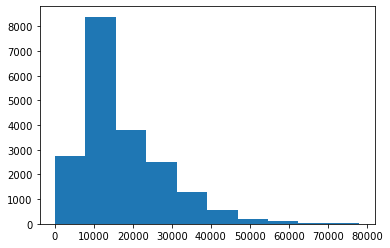

In [214]:
plt.hist(oa.loc[(oa.IncomeAnnual != 0) & (oa.IncomeAnnual < 80000), 'IncomeAnnual']);

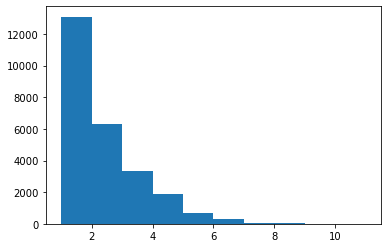

In [221]:
plt.hist(x=oa['HouseholdSize']);

In [229]:
len(oa.LegalState.value_counts().index)

44

In [226]:
oa.LegalZIP.value_counts()

97402    7181
97401    3493
97477    3416
97478    1782
97404    1608
         ... 
97462       1
85225       1
44052       1
30014       1
7104        1
Name: LegalZIP, Length: 548, dtype: int64

In [225]:
oa.HouseholdMinors.value_counts()

0    16426
1     4624
2     2868
3     1261
4      336
5      163
6       22
7        9
8        5
9        4
Name: HouseholdMinors, dtype: int64

In [224]:
oa.EmancipatedMinor.value_counts()

0    25710
1        8
Name: EmancipatedMinor, dtype: int64

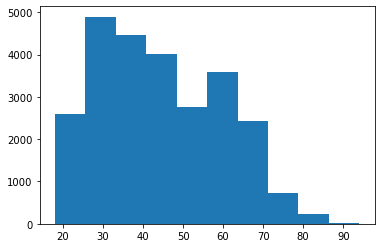

In [215]:
plt.hist(x=oa['Age']);

In [199]:
oa['Age'].value_counts()

35    760
38    740
28    684
36    667
33    656
     ... 
88      7
87      6
85      4
94      3
93      1
Name: Age, Length: 73, dtype: int64

In [197]:
oa['Language'].value_counts()

eng    25683
spa       35
Name: Language, dtype: int64

In [159]:
oa.shape

(25718, 56)

In [158]:
len(oa.KeyApplication.unique())

25718

In [37]:
oa.loc[oa.KeyApplication==5419013, ['LegalAddress1','LegalAddress2', 'LegalCity', 'LegalState', 'LegalZIP', 'LegalZIP4']]

,LegalAddress1,LegalAddress2,LegalCity,LegalState,LegalZIP,LegalZIP4
0,1071 FAIRFIELD AVE,APT 100,EUGENE,OR,97402,2063.0


In [36]:
oa.loc[oa.KeyApplication==5419013, ['HouseholdSize', 'HouseholdMinors', 'PreviousAgencyID', 'Citizenship']]

,HouseholdSize,HouseholdMinors,PreviousAgencyID,Citizenship
0,3,1,NaN,EC


In [8]:
os.listdir(inpath)

['ApplicantIncome.csv',
 'ApplicationContacts.csv',
 'ApplicationMembers.csv',
 'ApplicationQuestionHistory.csv',
 'Codes added via KEY LCOG WaitlistConnect2022_Draft_D20221201 (003).xlsx',
 'Dashboard visual with RA Added.pptx',
 'HowDidYouHear.xlsx',
 'OnlineApplications.csv']

In [9]:
# applicant income
ai = pd.read_csv(inpath + '\\ApplicantIncome.csv')

In [27]:
ai.loc[ai.KeyApplication==5419013, ['KeyIncome', 'Amount', 'HowOften']]

,KeyIncome,Amount,HowOften
0,6471877,3500.0,Monthly


In [28]:
3500*12

42000

In [10]:
# application contacts
ac = pd.read_csv(inpath + '\\ApplicationContacts.csv')

In [238]:
ac.head(3)

,KeyContact,KeyApplication,Name,StreetAddress,City,State,ZIP,PhoneNumber,CellNumber,Email,...,ReasonTermination,ReasonEviction,ReasonLatePayment,ReasonRecertification,ReasonChangeInLeaseTerms,ReasonChangeInHouseRules,ReasonOther,ReasonOtherDetail,TSModified,TSCreated
0,786912,5419064,Carol Post,1367 Brookhaven Circle,Toccoa,GA,30577,(706) 779-3359,NaN,cpost@bellsouth.net,...,0,0,0,0,0,0,0,NaN,2022-07-26 12:10:03,2022-07-26 12:10:03
1,786916,5419158,GIANNA N SANDERS,1642 Water St,Springfield,OR,97477,(541) 228-2001,NaN,hellsangel459335@msn.com,...,0,0,0,0,0,0,1,For any help or if you cannot reach me,2022-07-26 12:13:15,2022-07-26 12:13:15
2,786917,5419159,Carl Davis,318 Grizzly Ave,Eugene,OR,97404,(503) 741-9768,(503) 741-9768,cdavisii@gmail.com,...,0,0,0,0,0,0,0,NaN,2022-07-26 12:13:17,2022-07-26 12:13:17


In [17]:
ac.columns

Index(['KeyContact', 'KeyApplication', 'Name', 'StreetAddress', 'City',
       'State', 'ZIP', 'PhoneNumber', 'CellNumber', 'Email', 'Relationship',
       'ReasonEmergency', 'ReasonUnableToContact', 'ReasonTermination',
       'ReasonEviction', 'ReasonLatePayment', 'ReasonRecertification',
       'ReasonChangeInLeaseTerms', 'ReasonChangeInHouseRules', 'ReasonOther',
       'ReasonOtherDetail', 'TSModified', 'TSCreated'],
      dtype='object')

In [30]:
ac.loc[ac.KeyApplication==5419013, 'Name']

Series([], Name: Name, dtype: object)

In [11]:
# application members
am = pd.read_csv(inpath + '\\ApplicationMembers.csv')

In [19]:
am.columns

Index(['KeyMember', 'KeyApplication', 'NameLast', 'NameMiddle', 'NameFirst',
       'SSN', 'DOB', 'Sex', 'Disabled', 'Relationship', 'Citizenship', 'Race',
       'Ethnicity'],
      dtype='object')

In [189]:
am['Age'] = am['DOB'].apply(lambda x: calculate_age(x))

In [192]:
am['Age'].value_counts()

1     1299
4     1276
2     1258
3     1122
6     1119
      ... 
88       9
87       6
85       4
94       3
93       1
Name: Age, Length: 91, dtype: int64

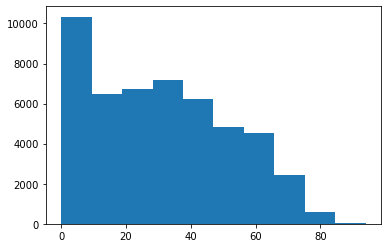

In [218]:
plt.hist(x=am['Age']);

In [193]:
am['Sex'].value_counts()

F    29022
M    20355
Name: Sex, dtype: int64

In [194]:
am['Disabled'].value_counts()

0    34796
1    14581
Name: Disabled, dtype: int64

In [195]:
am['Race'].value_counts()

1            36615
2             3140
6             2807
3             1462
1,3            991
             ...  
1,4g,6           1
3,1,2            1
1,2,4b           1
1,2,3,5,6        1
4,1,2,6          1
Name: Race, Length: 131, dtype: int64

In [196]:
am['Ethnicity'].value_counts()

0    42013
1     7364
Name: Ethnicity, dtype: int64

In [185]:
datetime.strptime(am.DOB.values[0], '%Y-%m-%d')

datetime.datetime(1988, 12, 4, 0, 0)

In [141]:
am.Citizenship.unique()

array(['EC', 'EN', 'IN', 'PV', 'IC', 'ND', nan], dtype=object)

In [33]:
# application question history
aqh = pd.read_csv(inpath + '\\ApplicationQuestionHistory.csv')

In [21]:
aqh.columns

Index(['QuestionID', 'KeyApplication', 'Question', 'Preference', 'Answer',
       'Response', 'TSModified', 'TSCreated'],
      dtype='object')

In [161]:
len(aqh.KeyApplication.unique())

25718

In [34]:
howheard = aqh[aqh.Preference=='P9']

In [175]:
howheard.Answer.unique()

array(['Yes', 'No'], dtype=object)

In [37]:
howheard.loc[:,'Response'] = howheard.copy()['Response'].str.capitalize()

In [38]:
howheard.Response.value_counts()

Email                                      2757
Friend                                     2306
Facebook                                   1148
Family                                     1092
Case manager                                800
                                           ... 
Ive been receving emails                      1
I got a message alert sent to my phone.       1
Sibling                                       1
Willamette families                           1
Beth johnson                                  1
Name: Response, Length: 2958, dtype: int64

In [172]:
hhout = howheard.Response.value_counts().rename_axis('how').reset_index(name='counts')

In [173]:
hhout.to_csv(r'T:\DCProjects\Support\Lane\HfG\how_heard.csv', index=False)

In [146]:
aqh.Preference.unique()

array(['P5', 'P7', 'P8', 'P9'], dtype=object)

In [72]:
out = df[df.P8BCat == "Unknown"]["Response"].value_counts().rename_axis('name').reset_index(name='counts')

In [73]:
out.to_csv(r'T:\DCProjects\Support\Lane\HfG\who_helped_others.csv', index=False)

In [13]:
# how did you hear
hh = pd.read_excel(inpath + '\\HowDidYouHear.xlsx')

In [157]:
hh.ValueToConvertTo.value_counts()

Lane County                                     14
Homes for Good                                  13
State of Oregon                                  5
Looking Glass                                    2
St. Vincent de Paul                              2
                                                ..
Cornerstone Community Housing                    1
Family/Friends                                   1
TV News                                          1
Veterans Administration (VA)                     1
Springfield Eugene Tenant Association (SETA)     1
Name: ValueToConvertTo, Length: 95, dtype: int64